In [2]:
import scipy.io
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [3]:
bat = scipy.io.loadmat('Synthetic_LiPo_PulseDischarge.mat')

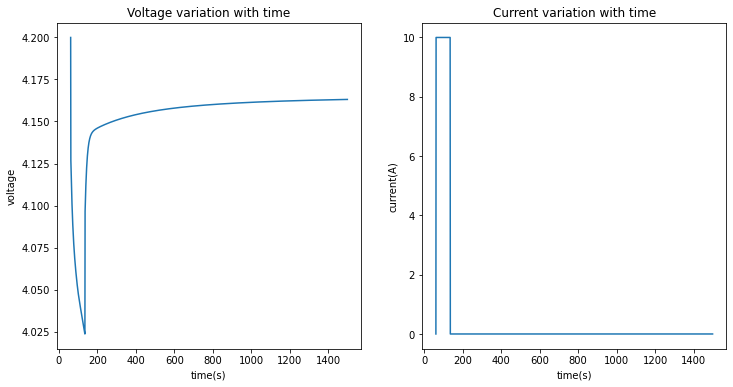

In [8]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(bat['time'][61:1500], bat['voltage'][61:1500])
plt.title("Voltage variation with time")
plt.xlabel("time(s)")
plt.ylabel("voltage")

plt.subplot(1,2,2)
plt.plot(bat['time'][61:1500], bat['current'][61:1500])
plt.title("Current variation with time")
plt.xlabel("time(s)")
plt.ylabel("current(A)")
plt.savefig("Current_Discharge_pulse.png")

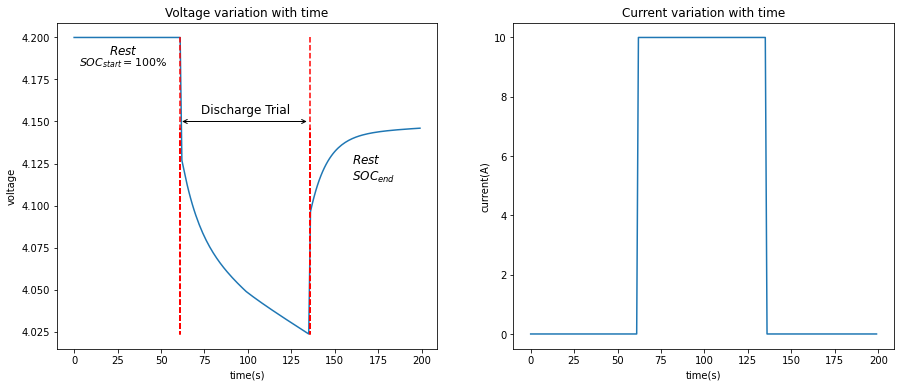

In [14]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(bat['time'][0:200], bat['voltage'][0:200])
plt.plot(61*np.ones(200), bat['voltage'][0:200], '--r')
plt.plot(136*np.ones(200), bat['voltage'][0:200], '--r')
plt.title("Voltage variation with time")
plt.xlabel("time(s)")
plt.ylabel("voltage")
plt.text(20, 4.19, '$Rest$', fontsize = 12)
plt.text(3, 4.183, '$SOC_{start} = 100\% $', fontsize = 11)
plt.text(160, 4.125, r'${Rest}$', fontsize = 12)
plt.text(160, 4.115, '$SOC_{end}$', fontsize = 12)
plt.annotate('', xy=(61,4.15), xytext=(135,4.15), arrowprops=dict(arrowstyle='<->'))
plt.text(73, 4.155, 'Discharge Trial', fontsize = 12)


plt.subplot(1, 2, 2)
plt.plot(bat['time'][0:200], bat['current'][0:200])
plt.title("Current variation with time")
plt.xlabel("time(s)")
plt.ylabel("current(A)")
plt.savefig("1_discharge_pulse.png")

Text(0, 0.5, 'Voltage(V)')

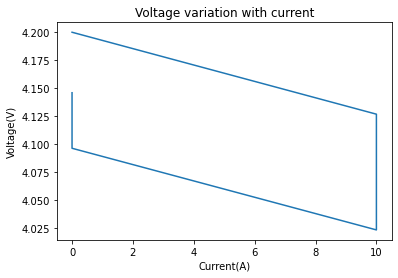

In [15]:
plt.plot(bat['current'][0:200], bat['voltage'][0:200],)
plt.title("Voltage variation with current")
plt.xlabel("Current(A)")
plt.ylabel("Voltage(V)")

In [16]:
index = []
max_cur = 0

for t in bat['time'][0:200]:
    if bat['current'][t] > 0:
        index.append(t)
        max_cur = bat['current'][t]

t_d = index[-1] - index[0]

Q = max_cur * 26 *t_d         # 26 discharge pulses
print('Battery Discharge Duration', t_d)
print('Battery Capacity:', Q)

Battery Discharge Duration [73]
Battery Capacity: [[18980.]]


In [17]:
z = np.zeros(len(bat['time'][0:200]))
z[0] = 1
t = 0
while t < len(bat['time'][0:200]) - 1:
    z[t+1] = z[t] - bat['current'][t]/Q
    t =t + 1
print(z)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99947313 0.99894626 0.99841939
 0.99789252 0.99736565 0.99683878 0.99631191 0.99578504 0.99525817
 0.9947313  0.99420443 0.99367756 0.99315068 0.99262381 0.99209694
 0.99157007 0.9910432  0.99051633 0.98998946 0.98946259 0.98893572
 0.98840885 0.98788198 0.98735511 0.98682824 0.98630137 0.9857745
 0.98524763 0.98472076 0.98419389 0.98366702 0.98314015 0.98261328
 0.982086

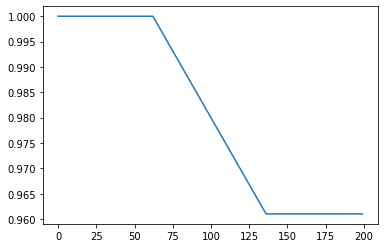

In [18]:
plt.plot(bat['time'][0:200], z)

In [19]:
def volt(X, t, V, N):
    v = np.zeros(N)
    count = 0
    for i in range(N):
        for j in range(len(t)):
            
            if X[i] == t[j]:
                v[i] = V[j]
    return v
    

In [21]:
V_pred = lambda t: Em - I[t]*R0 - I[t]*R1*(1 - np.exp(-t/(R1 * C1))

SyntaxError: unexpected EOF while parsing (1414968707.py, line 1)

In [69]:
# Define the kernel

def kernel(a, b):
    kernelParameter_l = 0.5
    kernelParameter_sigma = 2.0
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T) + np.random.normal(size = a.shape[0]).reshape(-1, 1)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-0.5 * (1/kernelParameter_l) * sqdist)


In [66]:
'''
def kernel(a, b):
    
    size = a.shape[0]
    K = np.zeros((size, size))
    
    for i in range(size):
        for j in range(size):
            sq_dist = (a[i] - b[j])**2
            K[i, j] = np.exp(-0.5*sq_dist)
    
    return K
'''

'\ndef kernel(a, b):\n    \n    size = a.shape[0]\n    K = np.zeros((size, size))\n    \n    for i in range(size):\n        for j in range(size):\n            sq_dist = (a[i] - b[j])**2\n            K[i, j] = np.exp(-0.5*sq_dist)\n    \n    return K\n'

In [76]:
np.random.seed(33)
N = 30    # Number of existing observation points (training [pomts])
n = 200   # number of test points

time_1 = np.squeeze(bat['time'][0:200])
voltage_1 = np.squeeze(bat['time'][0:200])
current_1 = np.squeeze(bat['current'][0:200])
time = np.squeeze(time_1)


X = np.random.choice(time, N).reshape(-1,1)       #training Points
voltage = volt(X, time_1, voltage_1, N)
K = kernel(X, X)

L = np.linalg.cholesky(K)

# Testing points, points for which we are going to make predictions
X_test = np.random.choice(voltage, n).reshape(-1, 1)
voltage_test = volt(X_test, time_1, voltage_1, n)

# Compute mean at the test points
Lk = np.linalg.solve(L, kernel(X, X_test))
mu = np.dot(Lk.T, np.linalg.solve(L, bat['voltage'][0:N]))

# Compute variance at test points
K_ = kernel(X_test, X_test)
s2 = np.diag(K_) - np.sum(Lk**2, axis = 0)
s = np.sqrt(s2)

#Plots
plt.figure()
plt.plot(X, voltage, 'k+')
#plt.plot(time_test, voltage_test, 'b-')

LinAlgError: Matrix is not positive definite

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

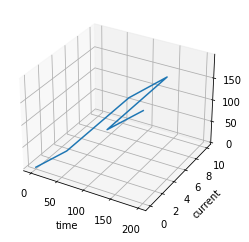

In [40]:
fig  = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(time_1, current_1, voltage_1)
plt.xlabel('time')
plt.ylabel('current')
plt.zlabel('Voltage')

In [74]:
np.linalg.eig(K)[0]

array([3.51213353e-01, 1.31534296e+00, 4.41446208e+00, 9.42037809e+00,
       7.77988559e+00, 1.02807456e+00, 3.91269695e-01, 8.81002635e-01,
       1.78679526e+00, 1.79601810e+00, 2.93512401e+00, 6.48860306e+00,
       5.24865662e+00, 3.63482592e+00, 4.05029596e+00, 3.35050363e+00,
       5.34920594e-01, 2.81116747e+00, 8.28516267e-01, 2.69705376e+00,
       4.63990809e+00, 4.45633479e+00, 5.37173836e+00, 3.00569440e+00,
       3.19265818e+00, 5.75594913e+00, 3.66529308e-17, 2.20850250e-16,
       3.03068435e+00, 1.52315863e+00])

In [58]:
np.random.normal(size = X.shape[0]).shape

(30,)

In [55]:
X.shape

(30, 1)